<a href="https://colab.research.google.com/github/SwanandKale/AIML_Bootcamp/blob/main/Deliberating_on_Start_Up_investments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset='/content/drive/MyDrive/ALML DataSets/50_Startups.xlsx'
import pandas as pd
df=pd.read_excel(dataset)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


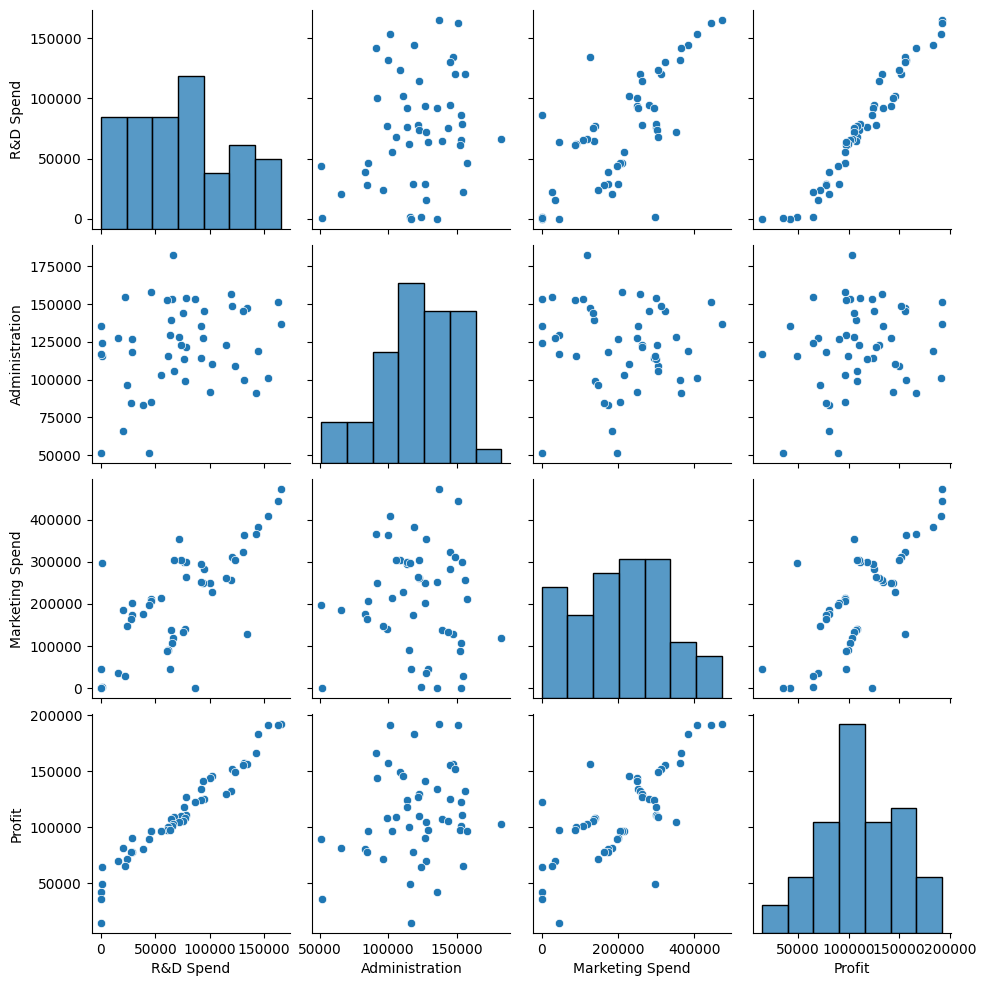

In [ ]:
import pandas as pd
import seaborn as sns

# Selecting the relevant columns
data = df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]

# Creating a scatter plot matrix
sns.pairplot(data)


<ipython-input-5-d30b2e3dfdc2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

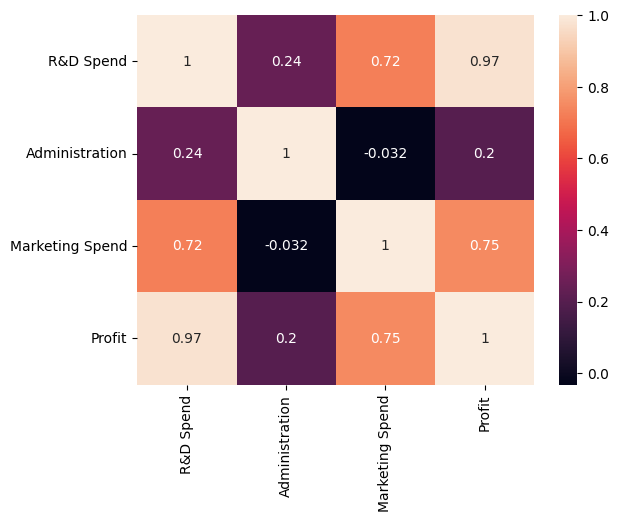

In [ ]:
#Building a correlation matrix

sns.heatmap(df.corr(),annot=True)

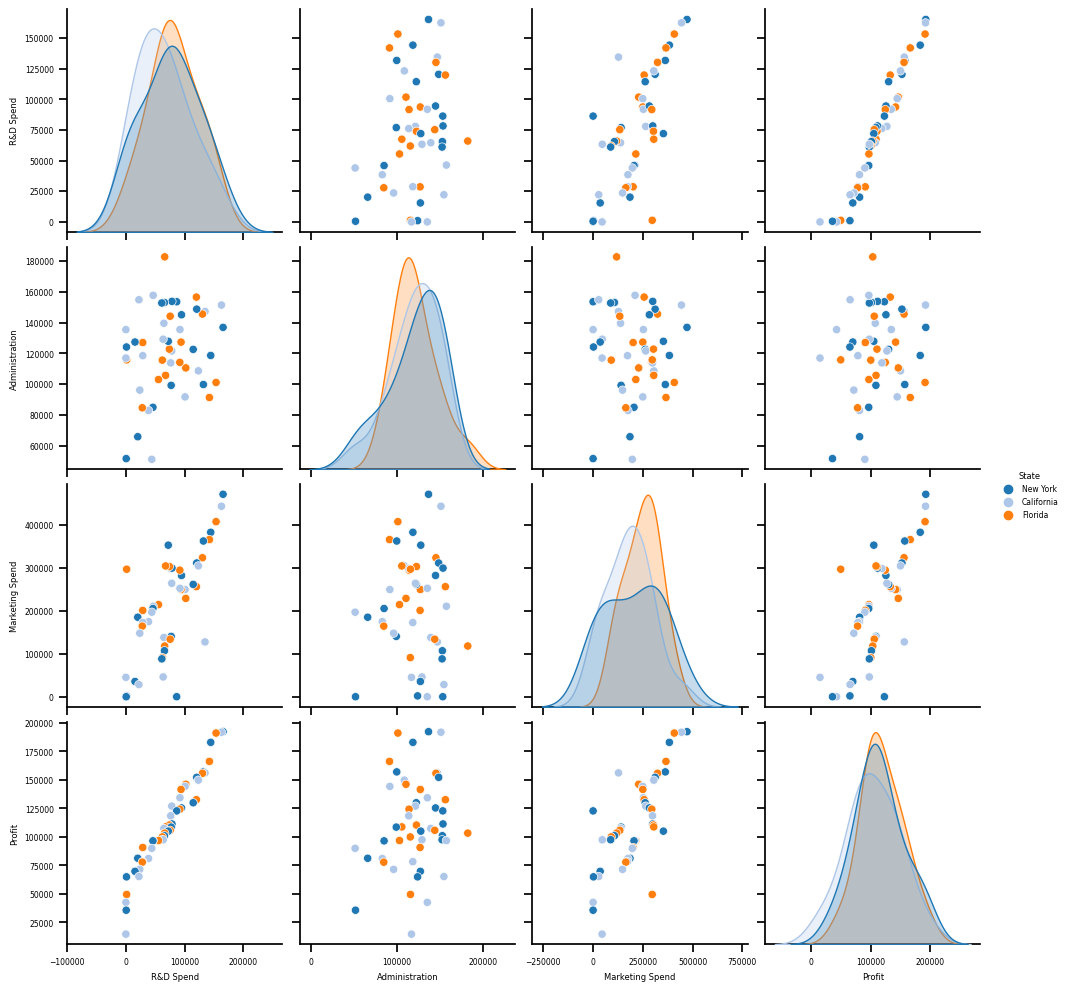

In [ ]:
import seaborn as sns

with sns.plotting_context("notebook",font_scale=0.5):

  sns.pairplot(df[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']] , hue='State' , palette='tab20')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

#Fit the encoder to categorial column state to numerical value
states=df['State']

df['State']=label_encoder.fit_transform(states)


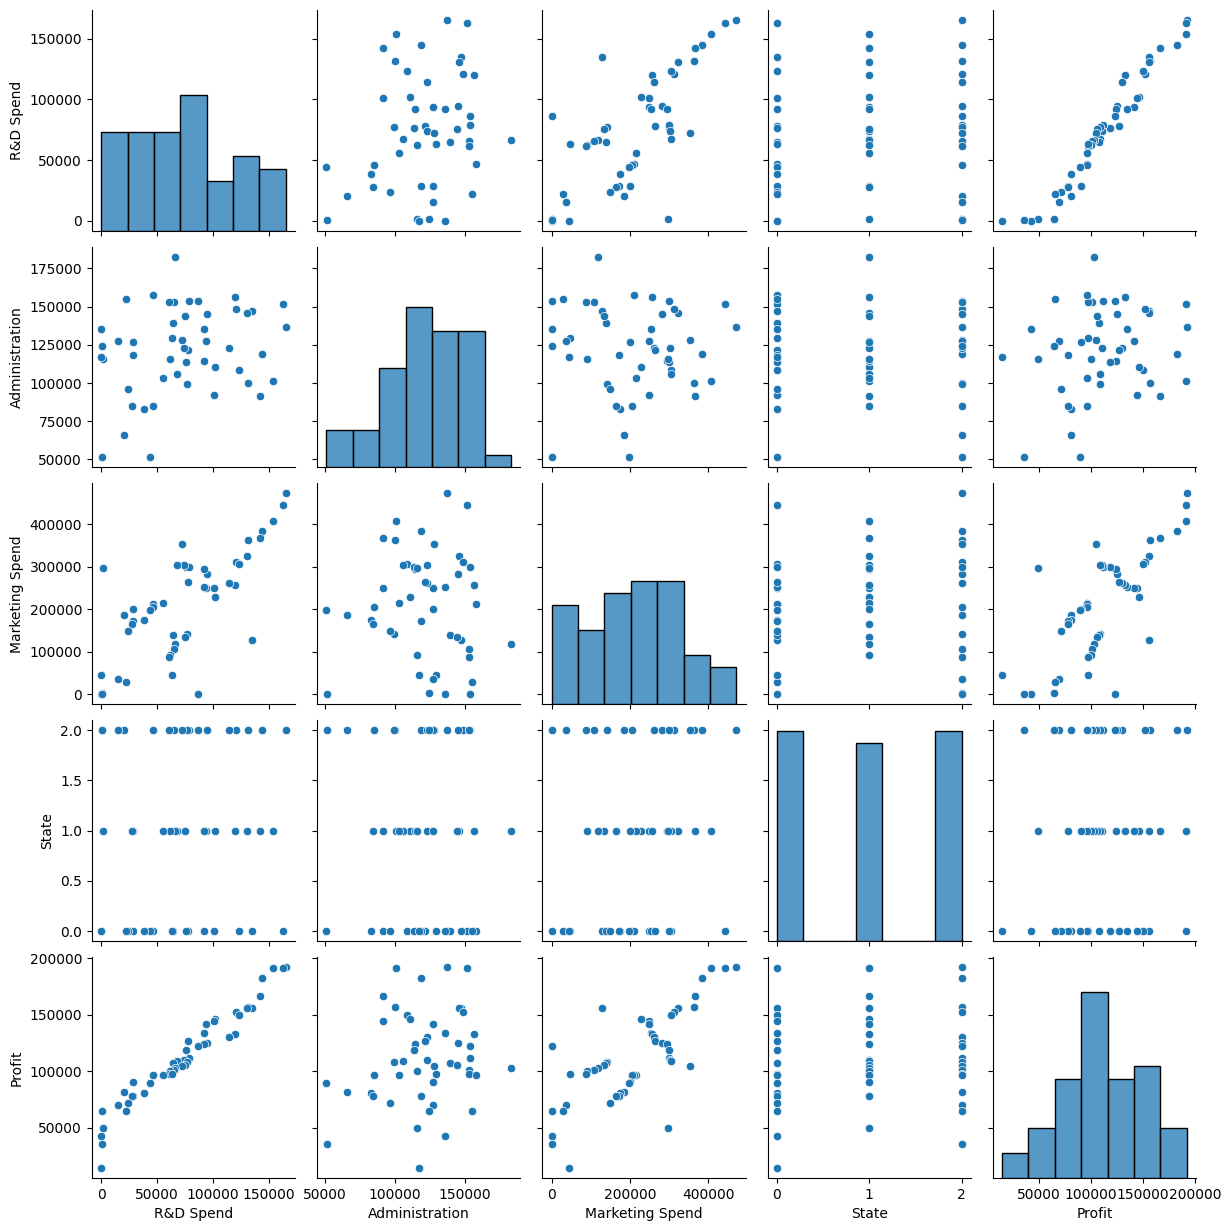

In [ ]:
# Selecting the relevant columns
data = df[['R&D Spend', 'Administration', 'Marketing Spend','State', 'Profit']]

# Creating a scatter plot matrix
sns.pairplot(data)

<Axes: >

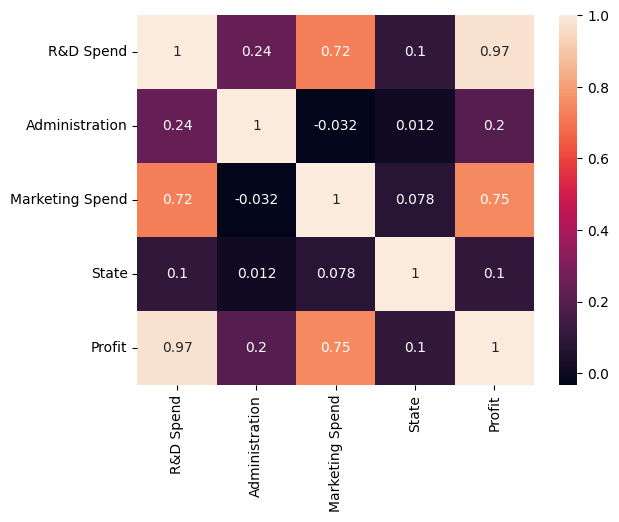

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit the encoder to the categorical column and transform the data
encoded_state= encoder.fit_transform(df['State'].values.reshape(-1, 1))
print(encoded_state)

In [ ]:
df

In [ ]:
#Create a new Data Frame
encoded_df=pd.DataFrame(encoded_state,columns=encoder.categories_[0])
encoded_df

#concatenate original df with encoded df

df=pd.concat([df,encoded_df],axis=1)
print(df)

In [ ]:
#Load the data into X and Y
# X-> all the independent Y-> dependent

X=df.drop('Profit',axis=1)
Y=df[['Profit']]


In [ ]:
X

In [ ]:
Y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train

In [ ]:
Y_train

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
X_train.columns = X_train.columns.astype(str)
model.fit(X_train.values,Y_train.values)

In [ ]:
y_pred=model.predict(X_test.values)
y_pred

In [ ]:
#Performance Evaluation

model.score(X_test.values,Y_test.values)*100

94.27525448832937

In [ ]:
model.score(X_train,Y_train)*100

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


94.85685658895623

In [ ]:
model.score(X.values,Y.values)*100

95.0335515922835

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(Y_test,y_pred)*100

3.8405755060131197

In [ ]:
model.coef_

array([[ 7.85133783e-01, -1.04588235e-02,  3.29544341e-02,
         2.34324838e+02,  1.43571585e+02, -5.21468009e+02,
         3.77896423e+02]])

In [ ]:
model.intercept_

array([48075.36690099])